# Recorrido de Grafos
        


In [113]:
class abstract_graph:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
    
    def adjacency_list(self):
        pass
    
class simple_graph(abstract_graph):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
        
    
    def adjacency_list(self):
        adjacent=lambda n : {v for u,v in self.edges if u==n } | {u for u,v in self.edges if v==n}
        return {v:adjacent(v) for v in self.nodes}

    
class simple_digraph(abstract_graph):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges if u!=None} | {v for u,v in self.edges if v!=None}
        
    def adjacency_list(self):
        adjacent=lambda n : {v for u,v in self.edges if u==n and v!=None} 
        return {v:adjacent(v) for v in self.nodes} 
    
    def in_degree(self):
        degree= lambda n : len({u for u,v in self.edges if v==n and u!=None})
        return {v:degree(v) for v in self.nodes}

In [114]:
import numpy as np
random_graph = lambda n,p : {(int(u),int(v)) for u in np.arange(n) for v 
                    in np.arange(n) if np.random.rand()>p and u!=v}
# cantidad de vértices
n=5e2
# 1- probabilidad de crear aristas
p=0.9

E=random_graph(n,p)
G=simple_digraph(E)

print(len(G.nodes))
#print G.adjacency_list()

500


In [115]:
U=list()
U.append(1)
U.append(2)
U.append(3)
U.append(4)
U.pop(0)

1

In [116]:
# https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/
import time
from collections import deque

def dfs(graph, start):
    visited, stack, path = set(), [start],[]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            path.append(vertex)
            stack.extend(graph[vertex] - visited)
    return path

def bfs(graph, start):
    visited, queue, path = set(), [start],[]
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            path.append(vertex)
            queue.extend(graph[vertex] - visited)
    return path

def bfs2(graph, start):
    visited, queue, path = set(), deque([start]),[]
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            path.append(vertex)
            queue.extend(graph[vertex] - visited)
    return path


start=time.clock()
bfs(G.adjacency_list(),1)
end=time.clock()-start
print('Tiempo BFS: {0:.2f}[s]'.format(end))
start=time.clock()
bfs2(G.adjacency_list(),1)
end=time.clock()-start
print('Tiempo BFS Queue: {0:.2f}[s]'.format(end))
start=time.clock()
dfs(G.adjacency_list(),1)
end=time.clock()-start
print('Tiempo DFS: {0:.2f}[s]'.format(end))


Tiempo BFS: 2.66[s]
Tiempo BFS Queue: 2.55[s]
Tiempo DFS: 2.63[s]


In [117]:
import timeit

print(timeit.timeit(stmt='l.pop(0)',setup='l = list(range(100000))',number=99999))
print(timeit.timeit(setup='import collections; l = collections.deque(range(100000))', stmt='l.popleft()', number=99999))

0.8974719200000436
0.00665127999991455


In [118]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

def tree_path(parents,start):
    path=[end]
    k=end
    while k is not None:
        path.append(parent[k])
        k=parent[k]
    return path[:-1][::-1]

print('DFS:',dfs(graph,'A'))
print('BFS:',bfs(graph,'A'))
print('BFS:',bfs2(graph,'A'))

DFS: ['A', 'C', 'F', 'E', 'B', 'D']
BFS: ['A', 'B', 'C', 'E', 'D', 'F']
BFS: ['A', 'B', 'C', 'E', 'D', 'F']


In [119]:
E=[('A','B'),('A','C'),('C','F'),('B','D'),('B','E'),('E','F')]
graph=simple_digraph(E)

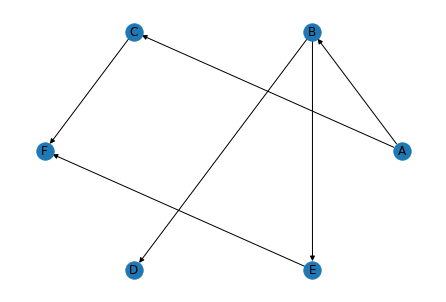

In [120]:

import networkx as nx
import matplotlib.pyplot as plt

G_nx=nx.DiGraph()
G_nx.add_edges_from(E)
pos = nx.circular_layout(G_nx)  # positions for all nodes
nx.draw(G_nx,with_labels=True,pos=pos)
labels = nx.get_edge_attributes(G_nx,'weight')
nx.draw_networkx_edge_labels(G_nx,pos,edge_labels=labels)

plt.show()

In [121]:
nx.find_cycle(G_nx)

NetworkXNoCycle: ignored

In [122]:
def topological_sort(graph):
    topology = []
    degree = graph.in_degree()
    adj=graph.adjacency_list()
    stack=[key for (key,value) in degree.items() if value==0]   
    while stack:
        vertex = stack.pop()
        topology.append(vertex)
        for m in adj[vertex]:
            degree[m] -= 1
            if not degree[m]:
                stack.append(m)
    if len(topology) < len(graph.nodes):
        raise ValueError('graph contains cycle')
    return topology




In [123]:
T=topological_sort(graph)

In [ ]:
T

['A', 'C', 'B', 'D', 'E', 'F']

In [205]:
import time
import os
import random
from multiprocessing import Process, Queue, Lock


def producer(queue, lock, names,degree,adj):
  with lock:
    print('Starting producer => {}'.format(os.getpid()))
  start=names[0]
  stack=[start]   
  while stack:
    vertex = stack.pop()
    queue.put(vertex)
    for m in adj[vertex]:
        with lock:
          degree[m] -= 1
          if degree[m]==0:
            stack.append(m)
  with lock:
    print('Producer {} exiting...'.format(os.getpid()))

def consumer(queue, lock):
    with lock:
        print('Starting consumer => {}'.format(os.getpid()))
    while True:
        name = queue.get()
        with lock:
            print('Process {} got {}'.format(os.getpid(), name))

            
def parallel_topological_sort(graph):
    degree = graph.in_degree()
    adj=graph.adjacency_list()
    lock = Lock()
    producers = []
    consumers = []
    names=[key for (key,value) in degree.items() if value==0]
    print(names)
    #names = [['F', 'G'],
    #         ['A', 'B', 'C', 'D', 'E']]
    queues = [Queue() for n in names]
    for i,n in enumerate(names):
        producers.append(Process(target=producer, args=(queues[i], lock, n,degree,adj)))

    for q in queues:
        p = Process(target=consumer, args=(q, lock))
        p.daemon = True
        consumers.append(p)

    for p in producers:
        p.start()

    for c in consumers:
        c.start()

    for p in producers:
        p.join()



In [200]:
graph.adjacency_list()

{'A': {'B', 'C'},
 'B': {'D', 'E'},
 'C': {'F'},
 'D': set(),
 'E': {'F'},
 'F': set()}

In [201]:
parallel_topological_sort(graph)

Starting producer => 1788
Producer 1788 exiting...
Starting consumer => 1791
Process 1791 got A
Process 1791 got C
Process 1791 got B
Process 1791 got D
Process 1791 got E
Process 1791 got F


In [202]:
graph.in_degree()

{'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 2}

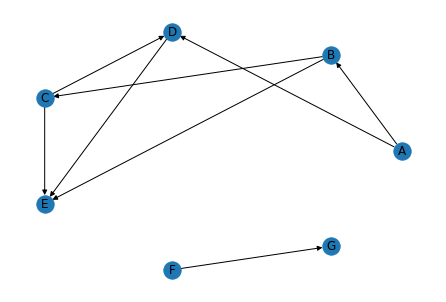

In [203]:
E=[('A', 'B'),('A', 'D'),('B', 'C'),('B', 'E'),('C', 'D'),('C', 'E'),('D', 'E'),('F', 'G')]
G=simple_digraph(E)

G_nx=nx.DiGraph()
G_nx.add_edges_from(E)
pos = nx.circular_layout(G_nx)  # positions for all nodes
nx.draw(G_nx,with_labels=True,pos=pos)
labels = nx.get_edge_attributes(G_nx,'weight')
nx.draw_networkx_edge_labels(G_nx,pos,edge_labels=labels)

plt.show()

In [206]:
print(G.adjacency_list())
print(G.in_degree())
L=topological_sort(G)
print('Orden topologico',L)

LP=parallel_topological_sort(G)

{'B': {'E', 'C'}, 'C': {'E', 'D'}, 'G': set(), 'E': set(), 'D': {'E'}, 'F': {'G'}, 'A': {'B', 'D'}}
{'B': 1, 'C': 1, 'G': 1, 'E': 3, 'D': 2, 'F': 0, 'A': 0}
Orden topologico ['A', 'B', 'C', 'D', 'E', 'F', 'G']
['F', 'A']
Starting producer => 1860
Starting producer => 1863
Producer 1860 exiting...
Producer 1863 exiting...
Starting consumer => 1873
Starting consumer => 1865
Process 1873 got A
Process 1873 got B
Process 1873 got C
Process 1873 got D
Process 1865 got F
Process 1865 got G
Process 1873 got E


In [133]:
G.nodes

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

# Resolución de Dependencias de Software


En esta tarea Ud. debe utilizar el algoritmo de ordenamiento topologico para implementar un gestor de paquetes para Python. De manera de instalar un paquete dado, el gestor de paquete debe analizar las dependencias. Las dependencias forman un grafo dirigido ya que los paquetes sin dependencias pueden ser instalados primero hasta completar la lista completa de dependencias.

Un problema común de los gestores de paquetes son las dependencias circulares :



$ pipdeptree
Warning!!! Cyclic dependencies found:
- CircularDependencyA => CircularDependencyB => CircularDependencyA
- CircularDependencyB => CircularDependencyA => CircularDependencyB

$ pipdeptree --json-tree > dependencias.json

Por lo tanto, de manera de convertir la lista de dependencias en un grafo acíclico dirigido (DAG), se debe eliminar este tipo de dependencias así como también los otros ciclos que puedan aparecer.

En particular, se debe entregar un informe con las siguientes actividades:

    1.) Convertir archivo JSON de dependencias de software en un DAG (eliminando ciclos).
    2.) Implementar ordenamiento topológico sobre el DAG para obtener la secuencia de instalación de los paquetes que satisface las dependencias.
    3.) **Extra**  Implementar un instalador paralelo. 
    
[Fuente](https://ipython-books.github.io/143-resolving-dependencies-in-a-directed-acyclic-graph-with-a-topological-sort/)


In [155]:
!pip install pipdeptree

In [301]:
! rm dependencias.json

In [302]:
!pipdeptree  --packages sklearn  --json-tree > dependencias.json

In [303]:
import json

with open('dependencias.json') as json_file:
    data=json.load(json_file)
    
#print(json.dumps(data,indent=4,sort_keys=True))

In [304]:
def import_package_dependencies(data,max_depth=3, depth=0):
  edge_list=set()
  if depth > max_depth:
    return
  node=data['key']
  if data['dependencies']:
    for dep in data['dependencies']:
      edge_list.update({(node,dep['key'])})
      child_edge=import_package_dependencies(dep,max_depth=max_depth, depth=depth+1)
      if child_edge:
        edge_list.update(child_edge)
  return edge_list 

In [305]:
import subprocess
import sys
import multiprocessing

def install(package):
    subprocess.call([sys.executable, "-m", "pip", "install", package])
    
class task_scheduler:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.di_graph=simple_digraph(_edges)
    
    def serial_processing(self):
        L=topological_sort(self.di_graph)
        return L

dep=[import_package_dependencies(pkg) for pkg in data]
E=list(set.union(*map(set, dep)))
scheduler=task_scheduler(E)
for i,task in enumerate(scheduler.serial_processing()):
    print(i,task)

0 pymc3
1 theano
2 plotnine
3 statsmodels
4 patsy
5 descartes
6 mizani
7 palettable
8 python-louvain
9 daft
10 pydot-ng
11 progressbar2
12 python-utils
13 cufflinks
14 colorlover
15 plotly
16 retrying
17 pydotplus
18 xarray
19 community
20 flask
21 itsdangerous
22 bs4
23 sklearn-pandas
24 missingno
25 seaborn
26 fa2
27 openpyxl
28 et-xmlfile
29 jdcal
30 pysndfile
31 google-cloud-bigquery-storage
32 deptree
33 jaxlib
34 gensim
35 smart-open
36 sympy
37 astropy
38 pycocotools
39 kapre
40 librosa
41 audioread
42 resampy
43 gspread-dataframe
44 gspread
45 pandas-datareader
46 lxml
47 jupyter
48 qtconsole
49 qtpy
50 ipywidgets
51 widgetsnbextension
52 jupyter-console
53 google-colab
54 notebook
55 nbconvert
56 testpath
57 bleach
58 mistune
59 defusedxml
60 pandocfilters
61 terminado
62 ipykernel
63 send2trash
64 portpicker
65 fastdtw
66 tensorflow-addons
67 typeguard
68 pydrive
69 oauth2client
70 lucid
71 umap-learn
72 numba
73 llvmlite
74 pyopengl
75 keras-vis
76 firebase-admin
77 cachecon

In [288]:
G=simple_digraph(E)

In [291]:
G.adjacency_list()

{'absl-py': {'six'},
 'alabaster': set(),
 'albumentations': {'imgaug', 'numpy', 'opencv-python', 'scipy'},
 'altair': {'entrypoints', 'jinja2', 'jsonschema', 'numpy', 'pandas', 'toolz'},
 'argon2-cffi': {'cffi', 'six'},
 'asgiref': set(),
 'astropy': {'numpy'},
 'astunparse': {'six', 'wheel'},
 'async-generator': set(),
 'atari-py': {'numpy', 'six'},
 'atomicwrites': set(),
 'attrs': set(),
 'audioread': set(),
 'autograd': {'future', 'numpy'},
 'babel': {'pytz'},
 'beautifulsoup4': set(),
 'bleach': {'packaging', 'six', 'webencodings'},
 'blis': {'numpy'},
 'bokeh': {'jinja2',
  'numpy',
  'packaging',
  'pillow',
  'python-dateutil',
  'pyyaml',
  'tornado',
  'typing-extensions'},
 'bottleneck': {'numpy'},
 'branca': {'jinja2'},
 'bs4': {'beautifulsoup4'},
 'cachecontrol': {'msgpack', 'requests'},
 'cachetools': set(),
 'catalogue': {'importlib-metadata'},
 'certifi': set(),
 'cffi': {'pycparser'},
 'chainer': {'filelock',
  'numpy',
  'protobuf',
  'setuptools',
  'six',
  'typing